# Assignment 9, Data Science
# Muhammad Abdullah

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") #optional
plt.style.use('fivethirtyeight') #optional
import pandas as pd
import statsmodels.api as sm
import matplotlib
import itertools
from pylab import rcParams
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv('karachi-weather-2021-2023.csv', parse_dates=['datetime'])
df.head()

,datetime,temp
0,2021-01-01,15.0
1,2021-01-02,15.4
2,2021-01-03,15.6
3,2021-01-04,16.3
4,2021-01-05,17.1


In [24]:
df.shape

(846, 2)

1. Aggregate the data into weekly mean. Use .resample('W').mean() 

In [4]:
weekly_mean_df = df.resample('W', on='datetime').mean()
weekly_mean_df.head()

,temp
datetime,
2021-01-03,15.333333
2021-01-10,16.028571
2021-01-17,17.085714
2021-01-24,19.457143
2021-01-31,17.800000


2. Read the dataset visualize the trend, seasonality, residual etc. Discuss your observations in the visualization.

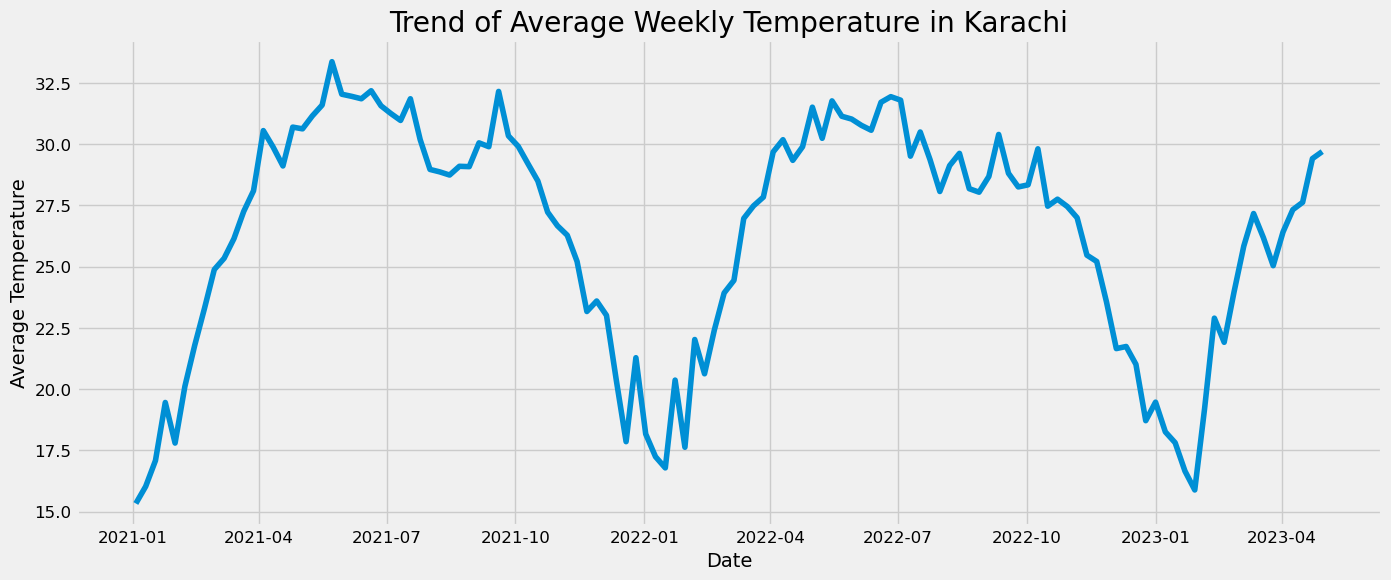

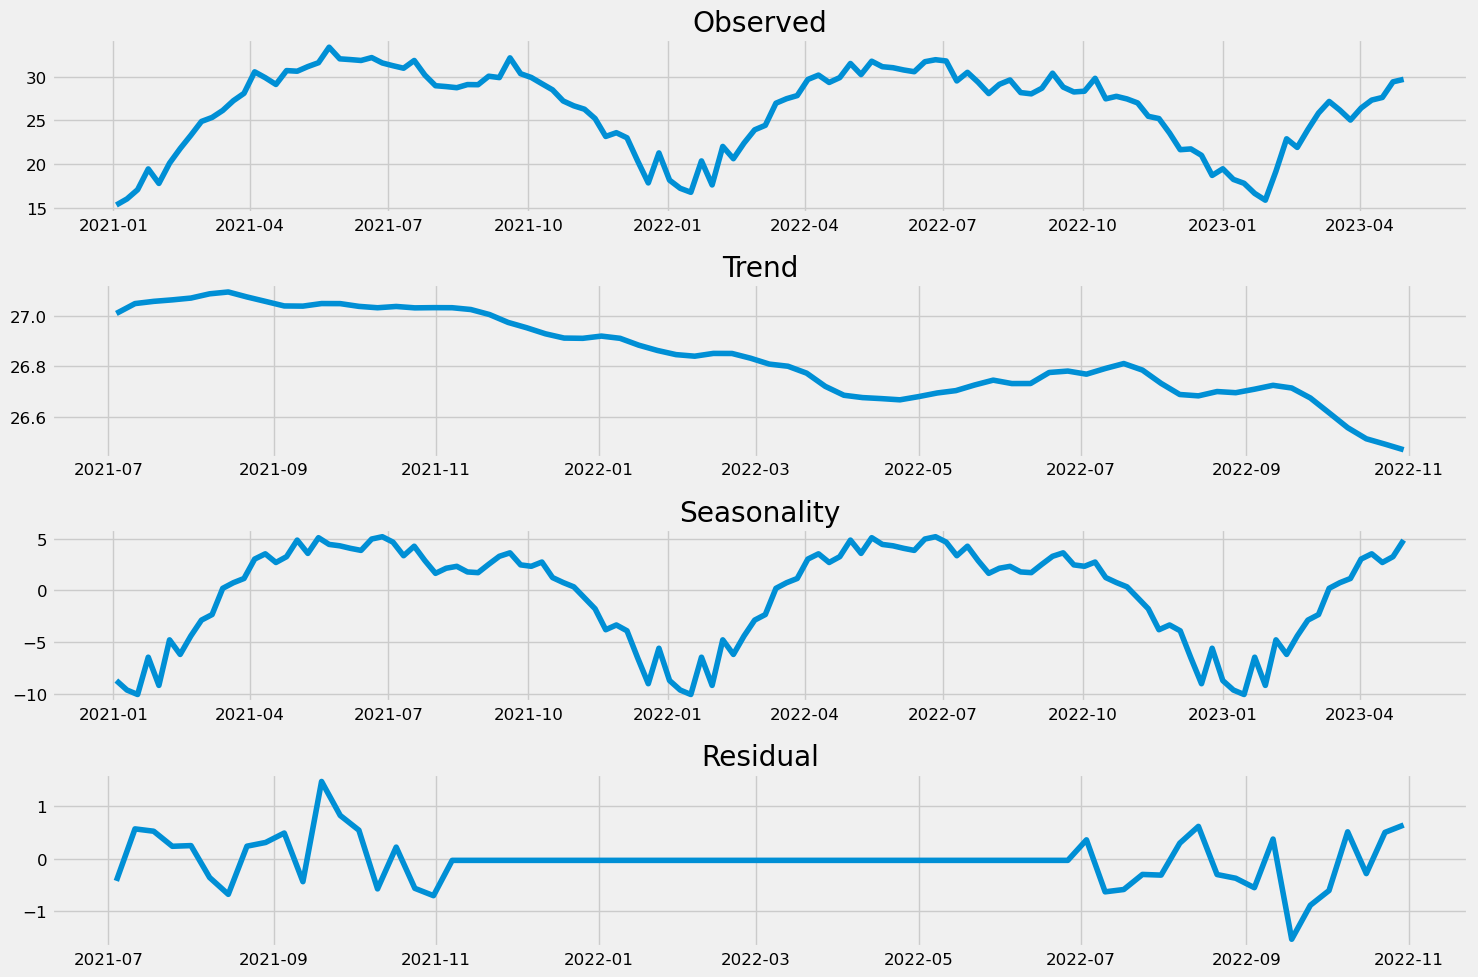

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(weekly_mean_df.index, weekly_mean_df['temp'])
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Trend of Average Weekly Temperature in Karachi')
plt.show()

decomposition = sm.tsa.seasonal_decompose(weekly_mean_df['temp'], model='additive')

plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonality')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()

Observations:

1. Trend: The overall trend in average weekly temperature seems to be slightly increasing or relatively stable over the period.

2. Seasonality: A clear yearly seasonality is present, with temperatures typically higher during the summer months and lower during the winter months.

3. Residual: The residuals generally fluctuate around zero, although there are some periods with larger deviations. This could indicate the presence of other factors or events affecting the temperature that are not captured by the trend and seasonality components.

4. In the weekly dataplot we can observe that the same pattern repeats every year, which also confirms consistency in seasonal patterns.

3. Split the data into train and test sets. Use all the data for 2021-2022 for training and 2023 for testing.

Train data shape: (104, 1)
Test data shape: (18, 1)


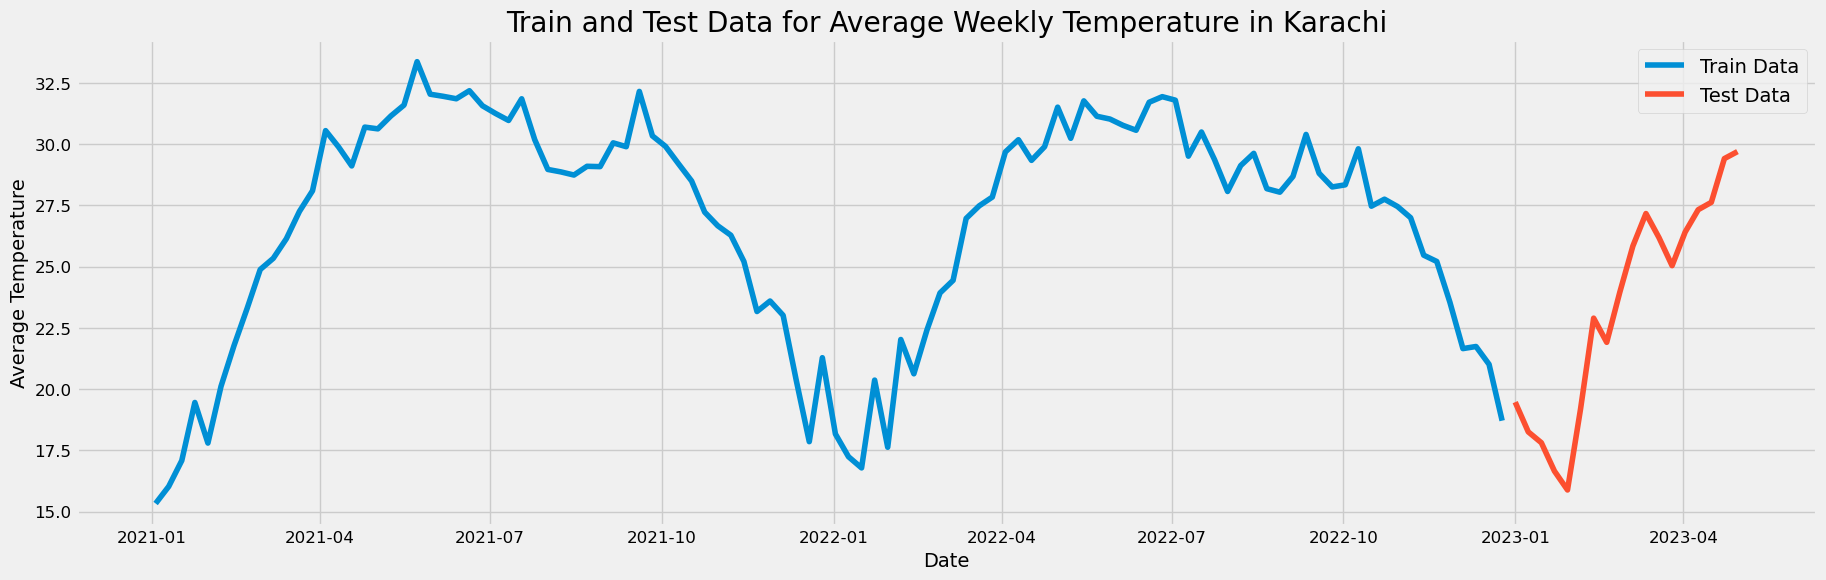

In [27]:
train_data = weekly_mean_df[weekly_mean_df.index.year.isin([2021, 2022])]
test_data = weekly_mean_df[weekly_mean_df.index.year == 2023]

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

plt.figure(figsize=(20, 6))
plt.plot(train_data.index, train_data['temp'], label='Train Data')
plt.plot(test_data.index, test_data['temp'], label='Test Data')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Train and Test Data for Average Weekly Temperature in Karachi')
plt.legend()
plt.show()

As is evident by the plot, the test data is from 2023, while the train data is from 2021 and 2022.

4. Use ARIMA, visualize the results and report the RMSE.

c:\Users\Abdullah\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE: 1.7099185651442417


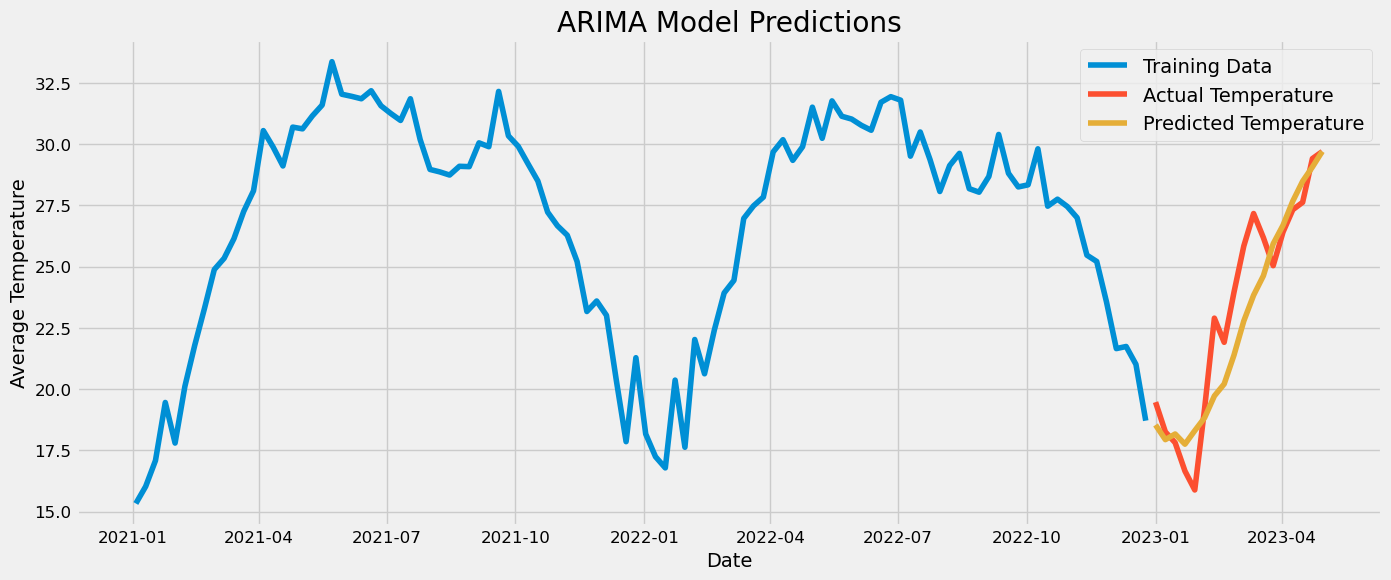

In [6]:
model = ARIMA(train_data['temp'], order=(14, 0, 15))  
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(weekly_mean_df)-1)

rmse = np.sqrt(mean_squared_error(test_data['temp'], predictions))
print('RMSE:', rmse)

plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['temp'], label='Training Data')
plt.plot(test_data.index, test_data['temp'], label='Actual Temperature')
plt.plot(test_data.index, predictions, label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()

In this I find the best RMSE value by trying out different combinations of pdq values and find a decent fitting RMSE of 1.7 at the above combination. This also shows an acceptable estimate of the predicted temperature in the plot, while not exactly very accurate.

5. Use SARIMA, visualize the results and report the RMSE. Use ‘52’ as the fourth parameter of seasonal_order (for example seasonal_order=(0, 0, 0, 52)) since there are 52 weeks in a year.

c:\Users\Abdullah\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA RMSE: 2.145599970704982


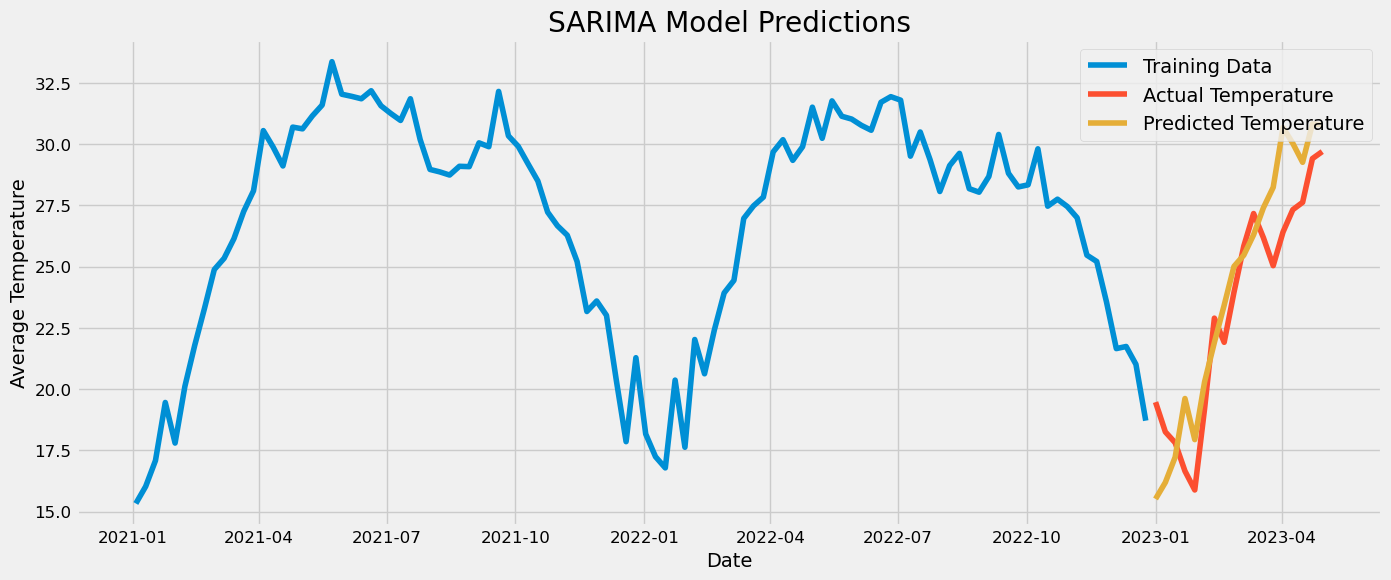

In [7]:
sarima_model = SARIMAX(train_data['temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52))
sarima_model_fit = sarima_model.fit()

sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(weekly_mean_df)-1)

sarima_rmse = np.sqrt(mean_squared_error(test_data['temp'], sarima_predictions))
print('SARIMA RMSE:', sarima_rmse)

plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['temp'], label='Training Data')
plt.plot(test_data.index, test_data['temp'], label='Actual Temperature')
plt.plot(test_data.index, sarima_predictions, label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('SARIMA Model Predictions')
plt.legend()
plt.show()

The RMSE for this SARIMA model is 2.146, which despite being higher than ARIMA RMSE in the previous part, is still an acceptable fitting for the data. It also shows us an acceptable prediction, from the second month of 2023 onwards. The first month value is considerably deviated, which also affects the RMSE value.

6. Try to come up with optimal parameters for SARIMA. Pick the best one, visualize the results and then report the RMSE. Compare both ARIMA and SARIMA and conclude which one is better?

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 0, 2, 52)
SARIMAX: (0, 0, 2) x (0, 1, 0, 52)
SARIMAX: (0, 0, 2) x (0, 1, 1, 52)
SARIMAX(0, 0, 0)x(0, 0, 0, 52) - AIC:975.881154723683
SARIMAX(0, 0, 0)x(0, 0, 1, 52) - AIC:485.8186289351568
SARIMAX(0, 0, 0)x(0, 0, 2, 52) - AIC:6.0
SARIMAX(0, 0, 0)x(0, 1, 0, 52) - AIC:169.29047146057792
SARIMAX(0, 0, 0)x(0, 1, 1, 52) - AIC:4.0
SARIMAX(0, 0, 0)x(0, 1, 2, 52) - AIC:6.0
SARIMAX(0, 0, 0)x(0, 2, 0, 52) - AIC:2.0
SARIMAX(0, 0, 0)x(0, 2, 1, 52) - AIC:4.0
SARIMAX(0, 0, 0)x(0, 2, 2, 52) - AIC:6.0
SARIMAX(0, 0, 0)x(1, 0, 0, 52) - AIC:174.99214845878194
SARIMAX(0, 0, 0)x(1, 0, 1, 52) - AIC:168.5857516201461
SARIMAX(0, 0, 0)x(1, 0, 2, 52) - AIC:8.0
SARIMAX(0, 0, 0)x(1, 1, 0, 52) - AIC:4.0
SARIMAX(0, 0, 0)x(1, 1, 1, 52) - AIC:6.0
SARIMAX(0, 0, 0)x(1, 1, 2, 52) - AIC:8.0
SARIMAX(0, 0, 0)x(1, 2, 0, 52) - AIC:4.0
SARIMAX(0, 0, 0)x(1, 2, 1, 52) - AIC:6.0
SARIMAX(0, 0, 0)x(1, 2, 2, 52) - AI

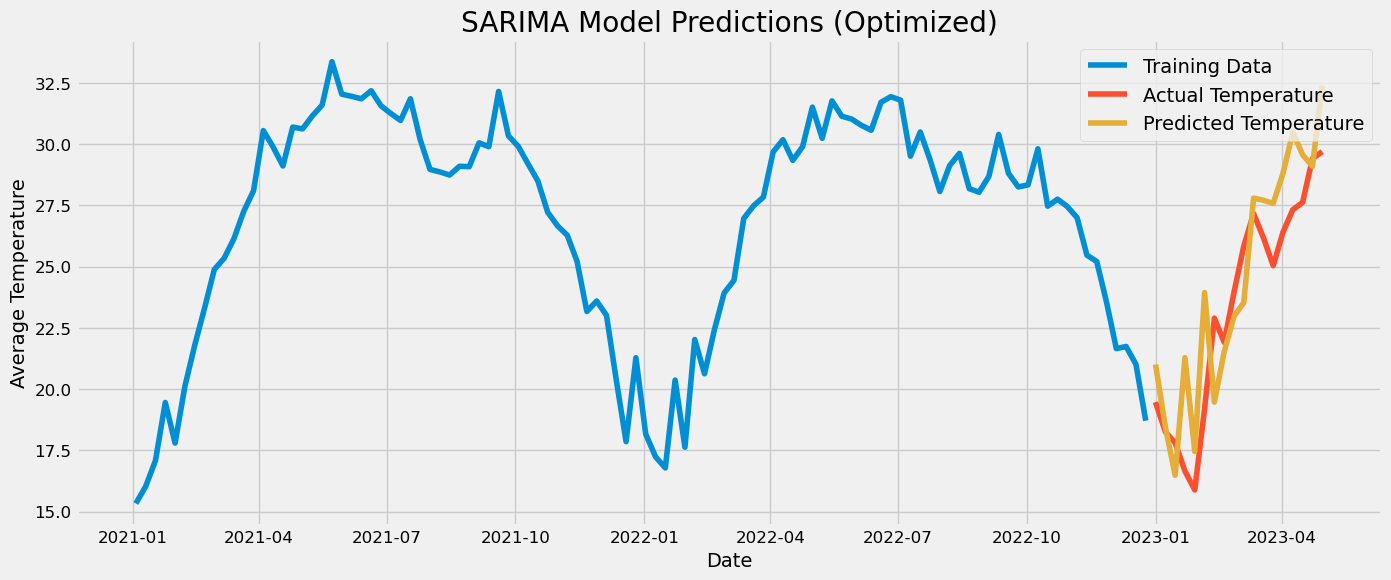

ARIMA RMSE: 11.335516213993396
SARIMA is better than ARIMA for this dataset.


In [ ]:
p = d = q = range(0, 3)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") 

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

best_aic = float("inf")
best_order = None
best_seasonal_order = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train_data['temp'],
                              order=param,
                              seasonal_order=param_seasonal,
                              enforce_stationarity=False,
                              enforce_invertibility=False)

            results = mod.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = param_seasonal
            print('SARIMAX{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

print('Best SARIMAX order:', best_order)
print('Best SARIMAX seasonal order:', best_seasonal_order)


model = SARIMAX(train_data['temp'], order=best_order, seasonal_order=best_seasonal_order)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(weekly_mean_df)-1)

rmse = np.sqrt(mean_squared_error(test_data['temp'], predictions))
print('SARIMA RMSE:', rmse)

plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['temp'], label='Training Data')
plt.plot(test_data.index, test_data['temp'], label='Actual Temperature')
plt.plot(test_data.index, predictions, label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('SARIMA Model Predictions (Optimized)')
plt.legend()
plt.show()

model_arima = ARIMA(train_data['temp'], order=(5, 1, 0))
model_arima_fit = model_arima.fit()
predictions_arima = model_arima_fit.predict(start=len(train_data), end=len(weekly_mean_df)-1)
rmse_arima = np.sqrt(mean_squared_error(test_data['temp'], predictions_arima))
print('ARIMA RMSE:', rmse_arima)

if rmse < rmse_arima:
    print("SARIMA is better than ARIMA for this dataset.")
else:
    print("ARIMA is better than SARIMA for this dataset.")

In this part I use the AIC criteria for finding the lowest AIC after iterating through all combinations. I find the most optimal value of my parameters at the lowest AIC value of 2.0, and find that across the iterations, SARIMA fits better than ARIMA for this dataset. However, this also means RMSE is not always the only criteria to judge model fitting, because considering only RMSE, we find that ARIMA fits this dataset better. 

Using AIC however, we find the parameters for which our model fits the data better, as can also be observed by the prediction plot which very closely follows the actual plot for the test data.

7. Now use any Machine Learning Regression technique and use the same training and testing set (used for ARIMA and SARIMA). Visualize the results and report the RMSE.

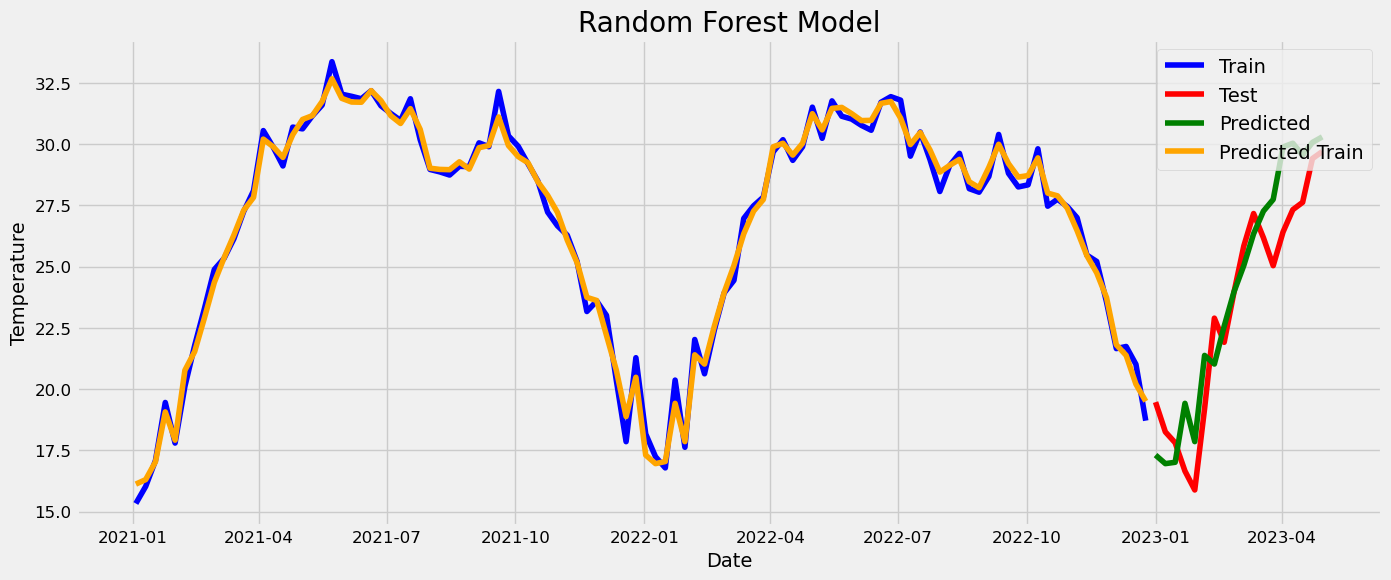

RMSE: 1.8403424117858647


In [31]:
months = [x.month for x in train_data.index]
years = [x.year for x in train_data.index]
days = [x.day for x in train_data.index]

X_train = np.array([days, months, years]).T
Y_train = train_data['temp'].values

months_test = [x.month for x in test_data.index]
years_test = [x.year for x in test_data.index]
days_test = [x.day for x in test_data.index]

X_test = np.array([days_test, months_test, years_test]).T
Y_test = test_data['temp'].values

rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, Y_train)

preds_train = rfmodel.predict(X_train)
preds = rfmodel.predict(X_test)

plt.figure(figsize=(15, 6))
plt.plot(train_data.index, train_data['temp'], label='Train', color='blue')
plt.plot(test_data.index, test_data['temp'], label='Test', color='red')
plt.plot(test_data.index, preds, label='Predicted', color='green')
plt.plot(train_data.index, preds_train, label='Predicted Train', color='orange')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Random Forest Model')
plt.legend()
plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, preds))
print('RMSE:', rmse)

Using RandomForest, I find out the most closely fitting prediction model, as we can see in the above plot that the Random Forest prediction lies over the test data for a considerable part and closely follows it in the other parts. We also get a very low RMSE value, which confirms that this is a good model for the data.

8. Compare all the RMSEs (ARIMA, SARIMA and ML Regression algorithms) and discuss which one is better.

The best ARIMA RMSE I converged to was: RMSE: 1.7099185651442417\\

The best SARIMA RMSE I converged to was: 2.4130764114921184 \\

The best RandomForest RMSE I converged to was: 1.8403424117858647\\

Therefore, the best option out of these was the ARIMA Model. I manually tuned values and luckily found the best parameters for it. The second best option is the RandomForest model, with the second lowest RMSE values. The worst performing model in these three is the SARIMA model, with the highest RMSA value.

9. Generate future dates (weekly) from Nov 1st 2024 to December 31th 2024 and predict the price using SARIMA model (with optimal parameters). Use pd.date_range(start='01/11/2024', end='01/12/2024', freq='W')

            predicted_temp
datetime                  
2024-01-14       29.328571
2024-01-21       31.942857
2024-01-28       28.914286
2024-02-04       30.014286
2024-02-11       29.585714
2024-02-18       29.285714
2024-02-25       31.242857
2024-03-03       32.314286
2024-03-10       32.342857
2024-03-17       28.057143
2024-03-24       29.142857
2024-03-31       28.557143
2024-04-07       27.171429
2024-04-14       29.385714
2024-04-21       30.514286
2024-04-28       27.271429
2024-05-05       27.000000
2024-05-12       27.314286
2024-05-19       30.900000
2024-05-26       25.471429
2024-06-02       26.171429
2024-06-09       26.771429
2024-06-16       30.428571
2024-06-23       26.442857
2024-06-30       28.285714
2024-07-07       28.242857
2024-07-14       27.714286
2024-07-21       25.728571
2024-07-28       27.257143
2024-08-04       23.514286
2024-08-11       20.300000
2024-08-18       23.114286
2024-08-25       24.171429
2024-09-01       16.142857
2024-09-08       20.771429
2

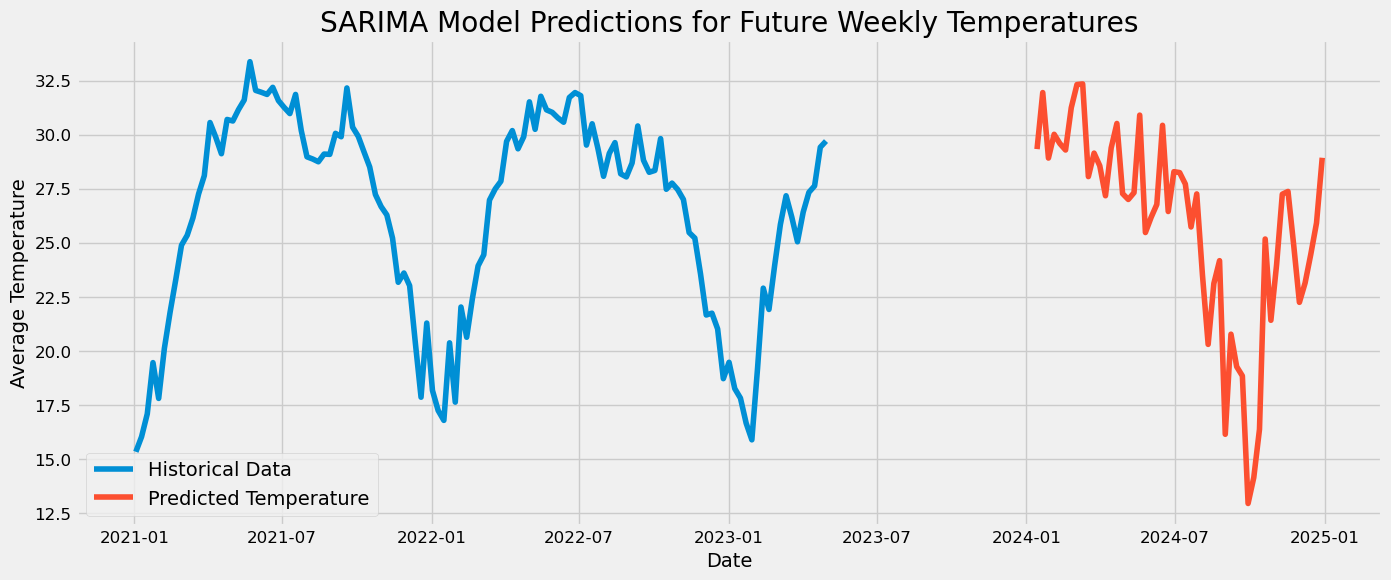

In [24]:
future_dates = pd.date_range(start='01/11/2024', end='31/12/2024', freq='W')

model = SARIMAX(weekly_mean_df['temp'], order=(0, 0, 0), seasonal_order=(0, 2, 0, 52)) #my optimal seasonal_order parameters for SATIMAX were seasonal_order=(0, 2, 0, 52) 
model_fit = model.fit()

predictions = model_fit.predict(start=len(weekly_mean_df), end=len(weekly_mean_df) + len(future_dates) - 1)

future_df = pd.DataFrame({'datetime': future_dates, 'predicted_temp': predictions})
future_df = future_df.set_index('datetime')

print(future_df)

plt.figure(figsize=(15, 6))
plt.plot(weekly_mean_df.index, weekly_mean_df['temp'], label='Historical Data')
plt.plot(future_df.index, future_df['predicted_temp'], label='Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('SARIMA Model Predictions for Future Weekly Temperatures')
plt.legend()
plt.show()

Using my optimal SARIMAX parameters from Q6, I find an acceptable prediction model, as the predicted temperatures are similar to the historical temperatures for the same seasons. However the prediction still fluctuates a lot and that indicates a slightly higher RMSE, with potential to improve this using a better model.

10. Using the same future dates, predict the price using any one ML regression model.

            predicted_temp
datetime                  
2024-01-14       17.106000
2024-01-21       19.682143
2024-01-28       18.104143
2024-02-04       21.550857
2024-02-11       20.984286
2024-02-18       22.532143
2024-02-25       23.957143
2024-03-03       25.039714
2024-03-10       25.483143
2024-03-17       26.835571
2024-03-24       27.448143
2024-03-31       27.827571
2024-04-07       30.165571
2024-04-14       29.787857
2024-04-21       29.541143
2024-04-28       30.285000
2024-05-05       30.678857
2024-05-12       30.708286
2024-05-19       31.414286
2024-05-26       31.412000
2024-06-02       31.110000
2024-06-09       30.718286
2024-06-16       31.435571
2024-06-23       31.746429
2024-06-30       31.199857
2024-07-07       30.353571
2024-07-14       30.505143
2024-07-21       30.105286
2024-07-28       29.636571
2024-08-04       29.126571
2024-08-11       29.727571
2024-08-18       28.942429
2024-08-25       28.325143
2024-09-01       29.020857
2024-09-08       29.493143
2

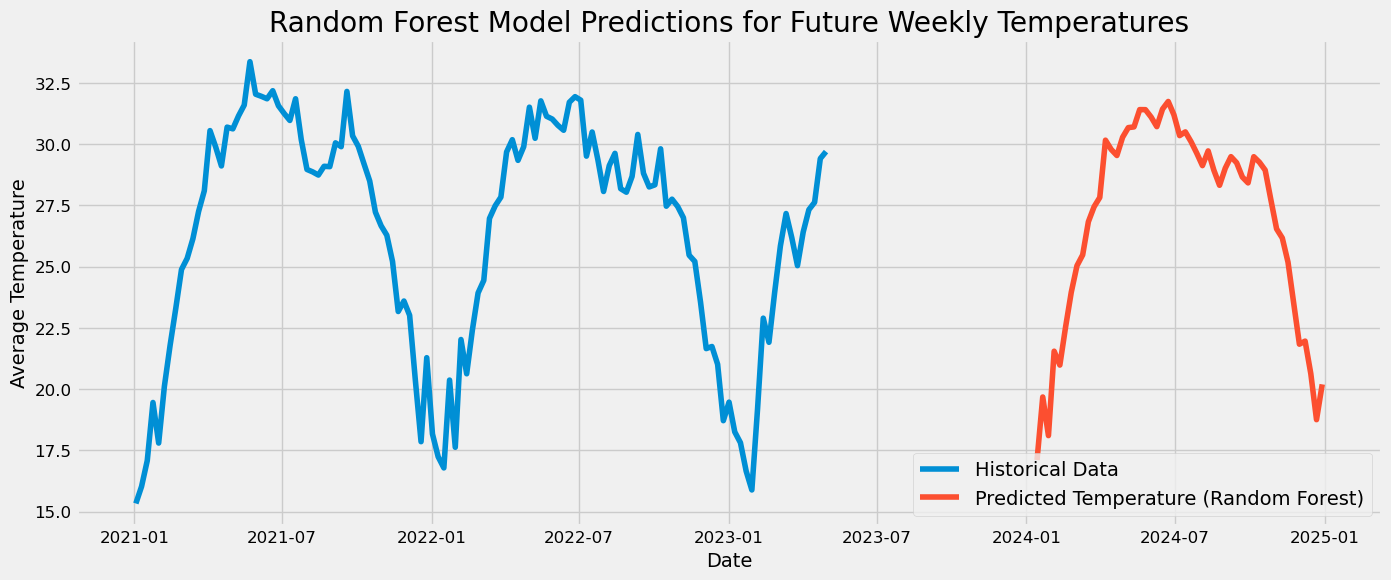

In [ ]:
future_dates = pd.date_range(start='01/11/2024', end='31/12/2024', freq='W')

future_days = [date.day for date in future_dates]
future_months = [date.month for date in future_dates]
future_years = [date.year for date in future_dates]

X_test = np.array([future_days, future_months, future_years]).T
Y_test = future_dates.values

months_train = [x.month for x in train_data.index]
years_train = [x.year for x in train_data.index]
days_train = [x.day for x in train_data.index]

X_train = np.array([days_train, months_train, years_train]).T
Y_train = train_data.values

rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

future_training = rf_model.predict(X_train)
future_predictions = rf_model.predict(X_test)

future_rf_df = pd.DataFrame({'datetime': future_dates, 'predicted_temp': future_predictions})
future_rf_df = future_rf_df.set_index('datetime')

print(future_rf_df)

plt.figure(figsize=(15, 6))
plt.plot(weekly_mean_df.index, weekly_mean_df['temp'], label='Historical Data')
plt.plot(future_rf_df.index, future_rf_df['predicted_temp'], label='Predicted Temperature (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.title('Random Forest Model Predictions for Future Weekly Temperatures')
plt.legend()
plt.show()

Using Random Forest, we find a better prediction model for the temperatures yet again. The predicted temperature does not deviate as much as SARIMAX and is almost identical to the historical data. This indicates a low RMSE value and a well fitted model.

11. Visualize and analyze the predictions from 9 and 10 and discuss their differences. 

Seasonal Pattern: Both models seem to capture the seasonal pattern reasonably well. However, the Random Forest model is slightly more flexible in adapting to subtle variations in the seasonal cycle.

Extrapolation: The Random Forest model's extrapolation appears smoother and more consistent with the historical data. The SARIMA model's predictions seem to have more fluctuations, which could be due to its linear assumptions.